<a href="https://colab.research.google.com/github/Zac-Sells/MLA_ZTS/blob/main/FinalProject_Regression_ZTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports



In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [391]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [392]:
from sklearn.linear_model import LinearRegression

In [393]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

###Reading data

In [394]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [395]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Concrete_Data.csv')

In [396]:
df.columns=['Cement_kg','Blast_Furnace_Slag_kg','Fly_Ash_kg','Water_kg','Superplasticizer_kg','Coarse_Aggregate_kg','Fine_Aggregate_kg','Age','Concrete_compressive_strength_mpa']

###Desscribing data

In [397]:
df.head()

,Cement_kg,Blast_Furnace_Slag_kg,Fly_Ash_kg,Water_kg,Superplasticizer_kg,Coarse_Aggregate_kg,Fine_Aggregate_kg,Age,Concrete_compressive_strength_mpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [398]:
df.tail()

,Cement_kg,Blast_Furnace_Slag_kg,Fly_Ash_kg,Water_kg,Superplasticizer_kg,Coarse_Aggregate_kg,Fine_Aggregate_kg,Age,Concrete_compressive_strength_mpa
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [399]:
df.sample(5)

,Cement_kg,Blast_Furnace_Slag_kg,Fly_Ash_kg,Water_kg,Superplasticizer_kg,Coarse_Aggregate_kg,Fine_Aggregate_kg,Age,Concrete_compressive_strength_mpa
129,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
771,331.0,0.0,0.0,192.0,0.0,978.0,825.0,3,13.52
744,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,7,14.50
830,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
326,252.3,0.0,98.8,146.3,14.2,987.8,889.0,28,50.60


In [400]:
df.dtypes

Cement_kg                            float64
Blast_Furnace_Slag_kg                float64
Fly_Ash_kg                           float64
Water_kg                             float64
Superplasticizer_kg                  float64
Coarse_Aggregate_kg                  float64
Fine_Aggregate_kg                    float64
Age                                    int64
Concrete_compressive_strength_mpa    float64
dtype: object

In [401]:
df.describe()

,Cement_kg,Blast_Furnace_Slag_kg,Fly_Ash_kg,Water_kg,Superplasticizer_kg,Coarse_Aggregate_kg,Fine_Aggregate_kg,Age,Concrete_compressive_strength_mpa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: xlabel='Cement_kg', ylabel='Concrete_compressive_strength_mpa'>

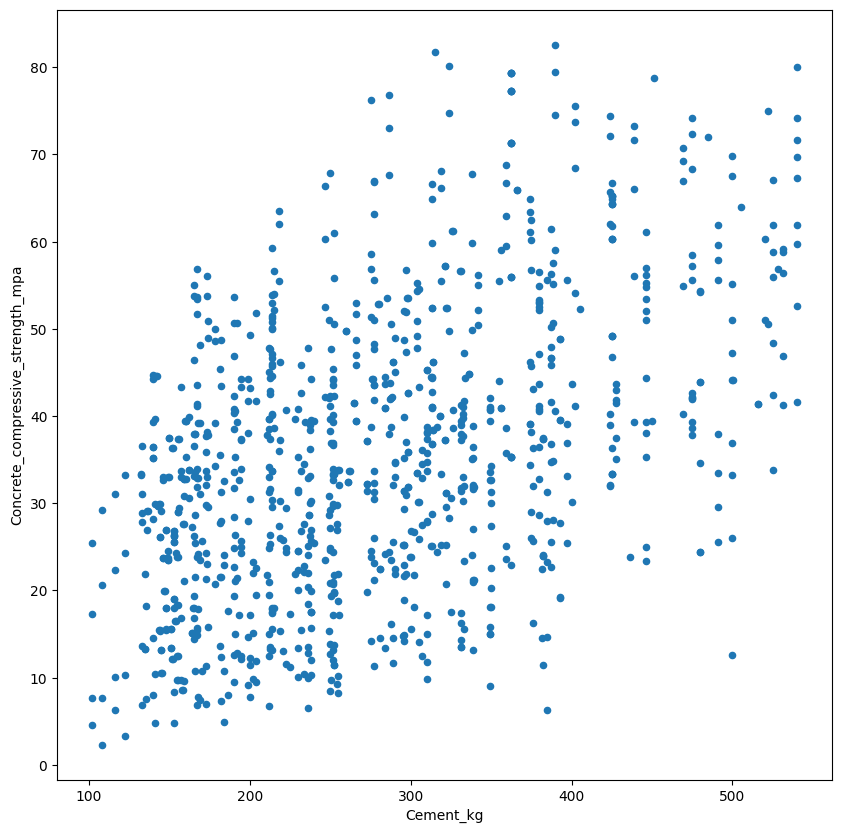

In [402]:
df.plot(kind='scatter',x='Cement_kg',y='Concrete_compressive_strength_mpa',figsize=(10,10))

<Axes: >

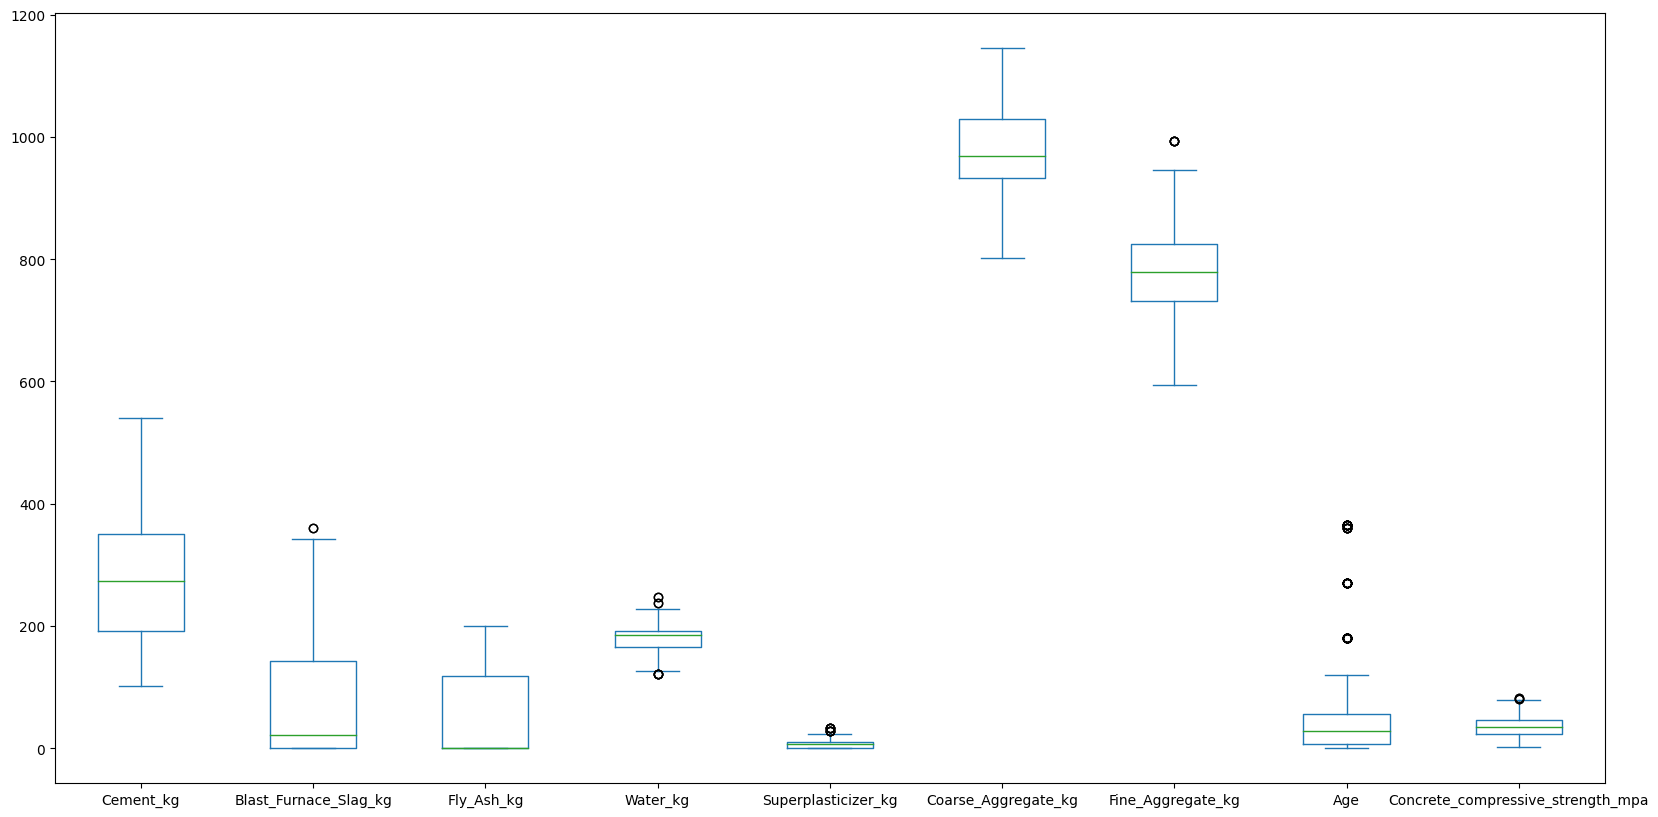

In [403]:
df.plot(kind='box', figsize=(20,10))

In [404]:
df.columns

Index(['Cement_kg', 'Blast_Furnace_Slag_kg', 'Fly_Ash_kg', 'Water_kg',
       'Superplasticizer_kg', 'Coarse_Aggregate_kg', 'Fine_Aggregate_kg',
       'Age', 'Concrete_compressive_strength_mpa'],
      dtype='object')

###Linear regression model

In [405]:
X = (df[['Cement_kg','Blast_Furnace_Slag_kg','Fly_Ash_kg','Water_kg','Superplasticizer_kg','Coarse_Aggregate_kg','Fine_Aggregate_kg','Age',]])
Y = (df[['Concrete_compressive_strength_mpa']])


In [406]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.20, random_state=4)

In [407]:
num_attribs=['Cement_kg','Blast_Furnace_Slag_kg','Fly_Ash_kg','Water_kg','Superplasticizer_kg','Coarse_Aggregate_kg','Fine_Aggregate_kg','Age']

In [408]:
col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)],remainder='passthrough')

In [409]:
pipeline = Pipeline([('transform', col_transform),('mlr_model', LinearRegression()),])

In [410]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Cement_kg',
                                                   'Blast_Furnace_Slag_kg',
                                                   'Fly_Ash_kg', 'Water_kg',
                                                   'Superplasticizer_kg',
                                                   'Coarse_Aggregate_kg',
                                                   'Fine_Aggregate_kg',
                                                   'Age'])])),
                ('mlr_model', LinearRegression())])

In [411]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [412]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

10.034586181252793
11.611472626489281


In [413]:
r2_score(y_train, y_train_pred)
r2_score(y_test, y_test_pred)

0.5543960836555618

###Evaluation of linear regression model

The linear regression model does not do a great job of predicting Concrete compressive strength. The RSME of the test and train sets are similar but not exact so this model is relatively consistent. The r2 score is only .55 which may be considered acceptable but means this model doesn't capture the variationof the data well.

#SVM model

In [414]:
X = (df[['Cement_kg','Blast_Furnace_Slag_kg','Fly_Ash_kg','Water_kg','Superplasticizer_kg','Coarse_Aggregate_kg','Fine_Aggregate_kg','Age',]])
Y = (df[['Concrete_compressive_strength_mpa']])

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.20, random_state=4)

In [416]:
num_attribs=['Cement_kg','Blast_Furnace_Slag_kg','Fly_Ash_kg','Water_kg','Superplasticizer_kg','Coarse_Aggregate_kg','Fine_Aggregate_kg','Age']

In [417]:
col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)],remainder='passthrough')

In [418]:
from sklearn.model_selection import GridSearchCV

In [419]:
pipeline=Pipeline([('trans',col_transform),('SVR',SVR(kernel='poly',C=1,max_iter=100000,epsilon=0.0))])

In [420]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Cement_kg',
                                                   'Blast_Furnace_Slag_kg',
                                                   'Fly_Ash_kg', 'Water_kg',
                                                   'Superplasticizer_kg',
                                                   'Coarse_Aggregate_kg',
                                                   'Fine_Aggregate_kg',
                                                   'Age'])])),
                ('SVR', SVR(C=1, epsilon=0.0, kernel='poly', max_iter=100000))])

In [421]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [422]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

7.410962682734381
9.006275400582961


In [423]:
r2_score(y_train, y_train_pred)
r2_score(y_test, y_test_pred)

0.7319197376862391

###Evaluation of SVM model

The SVM model does a decent, but not a great job of predicting Concrete compressive strength. The RSME of the test and train sets are similar but not exact so this model is relatively consistent. The r2 score is .73 means this model captures the variation of the data some what well, but not great.

###Conclusion

Neither model does a great job of predicting Concrete compressive strength. The SVM model with a poly kernel generated the greatest results. These result are not great, but would be considered acceptable. 